In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

## Prepare Data

In [2]:
df = pd.read_csv('./data/cleaned_data.csv')

In [3]:
df.head()

,company,company_size,job_title,level,domain,yoe_total,yoe_at_company,base,stock,bonus,total_compensation,location
0,Logitech,7250,Software Engineer,I4,Testing (SDET),10,5,190000,10000,0,200000,San Francisco Bay Area
1,Logitech,7250,Software Engineer,I2,ML / AI,4,3,126000,0,7000,133000,"Vancouver, WA"
2,Logitech,7250,Software Engineer,I3,Testing (SDET),11,11,120000,5000,12000,137000,"San Francisco, CA"
3,Logitech,7250,Software Engineer,I4,Production,8,8,100000,10000,0,110000,"Hsin-chu, TP, Taiwan"
4,Logitech,7250,Software Engineer,I4,Android,13,1,185000,15000,18500,218500,"San Francisco, CA"


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1718 entries, 0 to 1717
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   company             1718 non-null   object
 1   company_size        1718 non-null   int64 
 2   job_title           1718 non-null   object
 3   level               1718 non-null   object
 4   domain              1718 non-null   object
 5   yoe_total           1718 non-null   int64 
 6   yoe_at_company      1718 non-null   int64 
 7   base                1718 non-null   int64 
 8   stock               1718 non-null   int64 
 9   bonus               1718 non-null   int64 
 10  total_compensation  1718 non-null   int64 
 11  location            1718 non-null   object
dtypes: int64(7), object(5)
memory usage: 161.2+ KB


In [5]:
# Chuyển đổi biến phân loại thành biến số


## Define the problem
Dự đoán mức lương (total_compensation) dựa trên các yếu tố như công ty, kích thước công ty, chức danh, cấp độ, lĩnh vực, và số năm kinh nghiệm làm việc.

**Đặt câu hỏi**

Làm thế nào mà yếu tố **location** ảnh hưởng đến mức lương của người lao động?

**Trả lời câu hỏi giúp chúng ta** 
- **Chiến Lược Nhân Sự Hiệu Quả**: Hiểu rõ cách địa điểm làm việc ảnh hưởng đến mức lương có thể giúp ta xây dựng chiến lược nhân sự hiệu quả. Điều này có thể bao gồm chiến lược tuyển dụng, chiến lược giữ chân nhân sự, và các chính sách mức lương phù hợp với từng địa điểm.
- **Quyết Định Chi Tiết về Mức Lương**: Thông tin về cách địa điểm ảnh hưởng đến mức lương có thể giúp ta đưa ra các quyết định chi tiết về mức lương. Điều này bao gồm việc xác định mức lương cơ bản và yếu tố khác có thể thay đổi theo địa điểm như tiền thuê nhà, thuế, ...
- **Quản Lý Hiệu Suất và Đàm Phán Mức Lương**: Hiểu rõ cách địa điểm làm việc ảnh hưởng đến mức lương có thể giúp quản lý hiệu suất và đàm phán mức lương hiệu quả hơn. Nếu có sự chênh lệch đáng kể giữa các địa điểm, quản lý có thể sử dụng thông tin này để thúc đẩy nhân viên và xử lý các trường hợp đàm phán.
- **Dự Báo Chi Phí Nhân Sự**: Thông tin về cách địa điểm ảnh hưởng đến mức lương cũng có thể hỗ trợ trong việc dự báo chi phí nhân sự. Ta có thể ước lượng chi phí nhân sự tương lai dựa trên chiến lược nhân sự và chính sách mức lương tương ứng với từng địa điểm.
- **Đối Phó với Khả Năng Chênh Lệch Khu Vực**: Nếu có sự chênh lệch mức lương giữa các địa điểm, ta có thể thực hiện các biện pháp để đối phó với khả năng chênh lệch khu vực, bảo đảm rằng chiến lược nhân sự và mức lương là phù hợp với điều kiện địa phương.

**Làm sao để ta trả lời được câu hỏi này:** chúng ta sẽ xem xét số lương trung bình của từng địa điểm.

## Analyzing to get the answer

In [6]:
avg_salary_df = pd.DataFrame()

# YOUR CODE HERE

# Find average for each country
avg_salary_df["Avg.total_compensation"] = df.groupby("location")["total_compensation"].mean()

# Set the index as a column - countries
avg_salary_df["location"] = avg_salary_df.index

# Drop the index
avg_salary_df.reset_index(drop=True, inplace=True)

# Sort the rows based of Average Birth Rate
avg_salary_df.sort_values("Avg.total_compensation", inplace=True, ascending=False)

# Display
avg_salary_df.head()

,Avg.total_compensation,location
113,897500.000000,"San Bruno, CA"
65,642250.000000,"Los Gatos, CA"
12,505000.000000,"Bloomington, IN"
27,490666.666667,"Cupertino, CA"
15,484000.000000,"Boulder, CO"


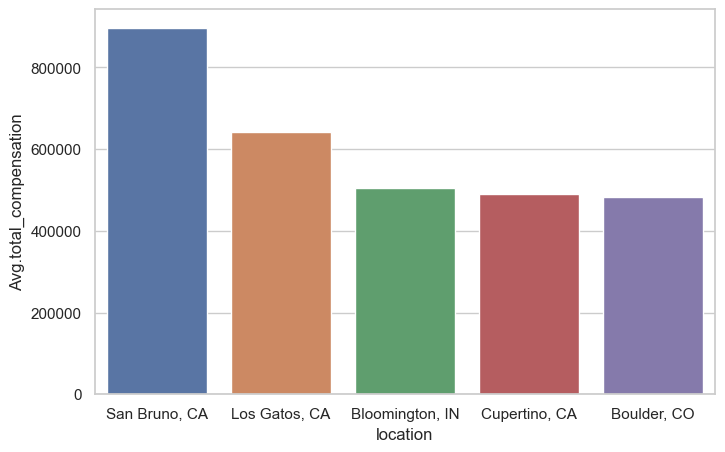

In [7]:
plt.figure(figsize=(8, 5))
sns.set(style="whitegrid")
ax = sns.barplot(data=avg_salary_df.head(), x="location", y= "Avg.total_compensation")